
# 📊 Análise de Preço de Criptomoeda com Dados Reais (CoinGecko)

Este notebook acessa a API da CoinGecko para obter preços históricos do Bitcoin e realiza uma análise básica de variação.

**Autor:** Leidiane Brito  
**Data:** 13/05/2025
    

## 📦 Instalação de dependências

In [50]:

!pip install pycoingecko pandas matplotlib


## 🧪 Importando bibliotecas

In [51]:

from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


## 📥 Coletando dados reais do Bitcoin

In [58]:

cg = CoinGeckoAPI()

# Pega os dados de mercado dos últimos 30 dias
# Changed 'Bitcoin' to 'bitcoin' to match the CoinGecko API coin ID.
data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

# Converte os dados de preço
precos = pd.DataFrame(data['prices'], columns=['timestamp', 'preco'])
precos['Data'] = pd.to_datetime(precos['timestamp'], unit='ms').dt.date
precos = precos.groupby('Data').mean().reset_index()
precos['Variação (%)'] = precos['preco'].pct_change() * 100
precos.rename(columns={'preco': 'Preço (USD)'}, inplace=True)
precos
precos


,Data,timestamp,Preço (USD),Variação (%)
0,2025-04-13,1.744580e+12,83590.066856,NaN
1,2025-04-14,1.744630e+12,84650.126756,1.268165
2,2025-04-15,1.744717e+12,85035.399965,0.455136
3,2025-04-16,1.744803e+12,83992.832805,-1.226039
4,2025-04-17,1.744890e+12,84565.778959,0.682137
5,2025-04-18,1.744976e+12,84633.451876,0.080024
6,2025-04-19,1.745063e+12,85071.920423,0.518079
7,2025-04-20,1.745149e+12,84760.039451,-0.366609
8,2025-04-21,1.745235e+12,87215.466460,2.896916
9,2025-04-22,1.745322e+12,89583.332842,2.714962


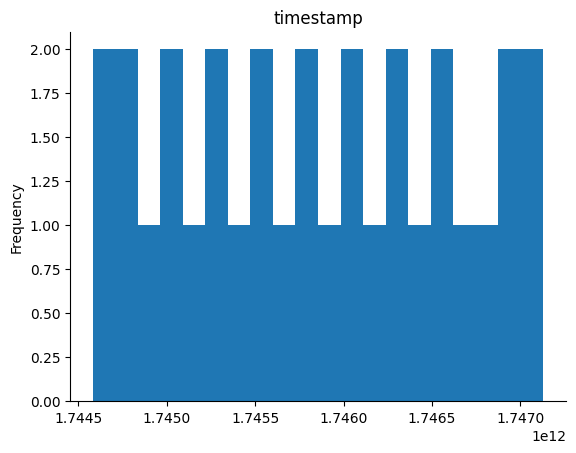

In [53]:
# @title timestamp

from matplotlib import pyplot as plt
precos['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 📈 Visualizando a variação de preço do Bitcoin

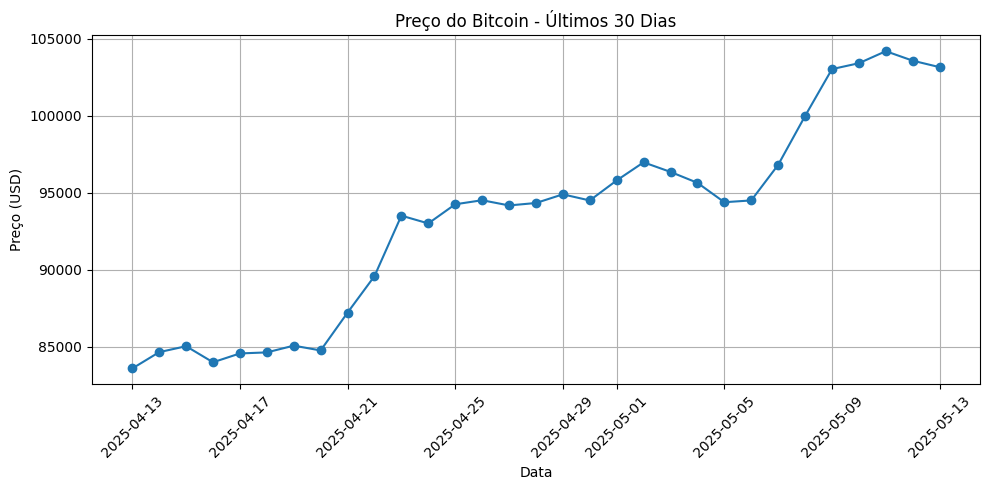

In [59]:

plt.figure(figsize=(10,5))
plt.plot(precos['Data'], precos['Preço (USD)'], marker='o')
plt.title('Preço do Bitcoin - Últimos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔎 Maiores variações

In [55]:

maior_alta = precos.loc[precos['Variação (%)'].idxmax()]
maior_alta = precos.loc[precos['Variação (%)'].idxmax()]
maior_queda = precos.loc[precos['Variação (%)'].idxmin()]

print(f"📈 Maior alta: {maior_alta['Variação (%)']:.2f}% em {maior_alta['Data']}")
print(f"📉 Maior queda: {maior_queda['Variação (%)']:.2f}% em {maior_queda['Data']}")

📈 Maior alta: 16.22% em 2025-05-09
📉 Maior queda: -2.65% em 2025-04-16


## ✅ Conclusão


Neste notebook, realizamos uma análise real dos preços do Bitcoin dos últimos 30 dias utilizando a API CoinGecko.

Você pode adaptar facilmente para outras criptomoedas como Ethereum, Solana ou outras disponíveis na API.

---

**por Leidiane Brito**
    